In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
# print(digits)

In [5]:
digits['data'].shape

(1797, 64)

In [6]:
digits['target'].shape

(1797,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size = 0.3)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9592592592592593

In [9]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9814814814814815

In [10]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

## K-FOLD

In [11]:
from sklearn.model_selection import KFold

In [12]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [13]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [14]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [15]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9592592592592593

In [16]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9814814814814815

In [17]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 4)

In [18]:
scores_lr = []
scores_svm = []
scores_rf = []
print(digits.data.shape)
for train_index, test_index in kf.split(digits.data):
    print(train_index.shape, test_index.shape)
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    
    scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators = 80), X_train, X_test, y_train, y_test))

(1797, 64)
(1198,) (599,)


C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(1198,) (599,)


C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(1198,) (599,)


C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
print(scores_lr)
print(scores_svm)
print(scores_rf)

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]
[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
[0.9365609348914858, 0.9565943238731218, 0.9282136894824707]


## Cross Val Score 

In [20]:
# doing same as above, but using sklearn built in libraries
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [22]:
cross_val_score(SVC(), digits.data, digits.target, cv = 5)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [23]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target, cv = 5)

array([0.94166667, 0.91111111, 0.96100279, 0.9637883 , 0.93036212])

In [24]:
trees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90]
scores_rf = []
for num_trees in trees:
    print(num_trees)
    scores_rf.append(np.mean(cross_val_score(RandomForestClassifier(n_estimators = num_trees), digits.data, digits.target, cv = 5)))

1
2
3
4
5
6
7
8
9
10
15
20
25
30
35
40
45
50
60
70
80
90


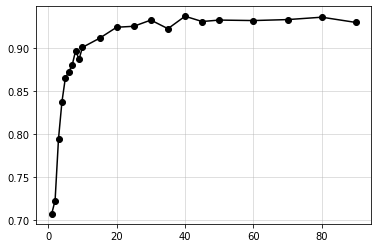

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(trees, scores_rf,'-ok')
plt.grid(alpha = 0.5)

In [26]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target, cv = 5)


array([0.94166667, 0.91388889, 0.9637883 , 0.96657382, 0.93314763])

In [27]:
def find_tree(n):
    mean_score = np.mean(cross_val_score(RandomForestClassifier(n_estimators = int(n), digits.data, digits.target, cv = 5))
    return 1 - mean_score

In [28]:
print(find_tree(20))


0.07789693593314762


In [29]:
import scipy.optimize as optimize

In [31]:
opt = optimize.minimize(find_tree, 2)
print(opt)

      fun: nan
 hess_inv: array([[1]])
      jac: array([nan])
  message: 'NaN result encountered.'
     nfev: 3
      nit: 0
     njev: 1
   status: 3
  success: False
        x: array([2.])


C:\Users\franc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'numpy.ndarray'>.

  FitFailedWarning)
C:\Users\franc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'numpy.ndarray'>.

  FitFailedWarning)
C:\Users\franc\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'numpy.ndarray'>.

  FitFailedWarning)
C:\Users\franc\Anaconda3\lib\site-packages\sklearn\model_selecti